In [4]:
import numpy as np
import matplotlib.pyplot as plt

EE = 20000000
NU = 0.3
LA = EE * NU / (1.0 + NU) / (1.0 - 2.0 * NU)
MU = EE / 2.0 / (1.0 + NU)

def calculate_matrix(para1, para2):
    matrix = np.zeros([6, 6])
    for i in range(0, 3) :
        for j in range(0, 3) :
            matrix[i][j] = para1
    for i in range(0, 3) :
        matrix[i][i] = para1 + 2 * para2
    for i in range(3, 6) : 
        matrix[i][i] = 2 * para2
    return matrix

D_e = calculate_matrix(LA, MU)

#np.set_printoptions(precision=2)
#print(D_e)

TT   = float(80)
STEP = 80
dT   = TT / STEP
T = float(0) 
S = 0

TEP = np.zeros([6])
VEP = np.zeros([6])
DEP = np.zeros([6])

TEP[0] = float(0.1)
TEP[1] = float(-0.03)
TEP[2] = float(-0.03)
TEP[3] = float(0)
TEP[4] = float(0)
TEP[5] = float(0)

for i in range(0, 6):
    VEP[i] = TEP[i] / TT
    DEP[i] = VEP[i] * dT

SIG_nodam = np.zeros([6])
SIG_nodam_list = []
while T < TT :
    DSIG_nodam = np.matmul(D_e, DEP)
    SIG_nodam = SIG_nodam + DSIG_nodam
    SIG_nodam_list.append(SIG_nodam[0])
    T = T + dT
T = float(0) 

i_w    = float(1)         #hydraulic gradient
i_c0   = float(5)           #a threshold hydraulic gradient to stop erosion
vPH_s  = float(0.51)        #volume ratio of sand
vPH_v0 = float(0.38)        #initial volume ratio of clay matrix
vPH_v  = float(vPH_v0)      #volume ratio of clay matrix
vPH_c  = float(0.4)         #volume ratio of clay

RH_w   = float(1000)         #density of water
RH_c   = float(1688)         #density of clay
vSI    = float(2)
GRAV   = float(9.81)
K_er   = float(5*10**-5)

vphi_vdim=vPH_v/vPH_v0           # dimensionless vphi_v
i_wdim   =i_w/i_c0                   # dimensionless i_w
phi_sdim =(1-vPH_s)/vPH_v0         # dimensionless phi_s                    
d_tdim =dT/(2*RH_c/(vSI*RH_w*GRAV*i_c0*K_er)/3600)  # calculate dif of dimensionless time

def f_erosion(vphi_vdim):

    if T == 0: 
        dvphi_vdim = 0
    else:
        dvphi_vdim = -i_wdim * (phi_sdim - vphi_vdim) / phi_sdim**(2/3) * (vphi_vdim**(2/3) -1 / (1 + i_wdim)) * d_tdim
        
    vphi_vdim = vphi_vdim+dvphi_vdim    # calculate dimensionless volume ratio of clay matrix
    
    omega = 1 - vphi_vdim  # calculate omega
    
    return vphi_vdim, omega

SIG = np.zeros([6])
EP = np.zeros([6])

omega_list = []
T_list = []
SIG_list = []
EP_list = []

while T < TT :

    vphi_vdim = f_erosion(vphi_vdim)[0]
    omega = f_erosion(vphi_vdim)[1] 
    DSIG = np.matmul(D_e, DEP)

    LA = (1 - omega) * (EE * NU / (1.0 + NU) / (1.0 - 2.0 * NU))
    MU = (1 - omega) *  EE / 2.0 / (1.0 + NU)
    D_e = calculate_matrix(LA, MU)

    SIG = SIG + DSIG
    EP  = EP + DEP
    EPV = EP[0] + EP[1] + EP[2]

    omega_list.append(omega)
    T_list.append(T)
    SIG_list.append(SIG[0])
    EP_list.append(EP[0])

    S = S + 1
    T = T + dT
    
    print('step', 'time', 'omega', 'sig0', 'dsig0', 'EP0')
    print(S, T, "%.3f"% omega, "%.3f"% SIG[0],"%.3f"% EP[0], "%.3f"% EPV)

step time omega sig0 dsig0 EP0
1 1.0 0.000 25000.000 0.001 0.001
step time omega sig0 dsig0 EP0
2 2.0 0.083 50000.000 0.003 0.001
step time omega sig0 dsig0 EP0
3 3.0 0.119 72922.919 0.004 0.001
step time omega sig0 dsig0 EP0
4 4.0 0.150 94937.220 0.005 0.002
step time omega sig0 dsig0 EP0
5 5.0 0.175 116180.903 0.006 0.003
step time omega sig0 dsig0 EP0
6 6.0 0.194 136805.225 0.008 0.003
step time omega sig0 dsig0 EP0
7 7.0 0.208 156954.971 0.009 0.004
step time omega sig0 dsig0 EP0
8 8.0 0.218 176755.320 0.010 0.004
step time omega sig0 dsig0 EP0
9 9.0 0.225 196306.437 0.011 0.005
step time omega sig0 dsig0 EP0
10 10.0 0.230 215683.961 0.012 0.005
step time omega sig0 dsig0 EP0
11 11.0 0.233 234942.653 0.014 0.005
step time omega sig0 dsig0 EP0
12 12.0 0.235 254120.988 0.015 0.006
step time omega sig0 dsig0 EP0
13 13.0 0.236 273245.442 0.016 0.006
step time omega sig0 dsig0 EP0
14 14.0 0.237 292333.972 0.017 0.007
step time omega sig0 dsig0 EP0
15 15.0 0.238 311398.646 0.019 0.007
st

(0.0, 80.0)

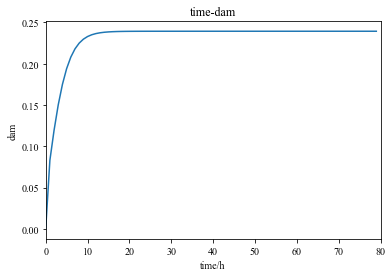

In [52]:
fig, ax = plt.subplots()
ax.plot(T_list, omega_list)
ax.set_xlabel('time/h')
ax.set_ylabel('dam')
ax.set_title('time-dam')
fig.savefig('time-dam.svg',dpi=1200)
plt.xlim(0,80)
#plt.ylim(0,0.2)


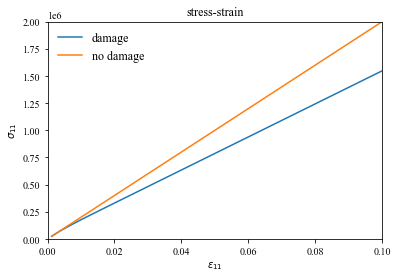

In [51]:
fig, ax = plt.subplots()
ax.plot(EP_list, SIG_list, label= 'damage')
ax.plot(EP_list, SIG_nodam_list, label= 'no damage')
ax.set_xlabel('$\epsilon_{11}$')
ax.set_ylabel('$\sigma_{11}$')
ax.set_title('stress-strain')
ax.legend(fontsize='large',edgecolor='white')
fig.savefig('stress-strain.svg',dpi=1200)
plt.xlim(0,TEP[0])
plt.ylim(0,SIG_nodam[0])
plt.rc('font',family='Times New Roman') 